In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.model_selection import LeaveOneOut
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
import scipy

In [3]:
# drugList = pd.read_csv("saved DF.csv", header=0)
# d = 'drugs.csv'
# D = pd.read_csv(d,header=None)
# for k in range(1,301):
#     drugList[k+1]=drugList['1'].map(D.set_index(0)[k])
#     k=k+1
# drugList.shape

In [4]:
# drugList = drugList.drop('0',axis=1)
# drugList.to_csv('533Drug_with_300_Feature.csv',index =False)

In [5]:

###reading data
# missing_value=['?']
data = pd.read_csv("533Drug_with_300_Feature.csv", header=0)

# # print(data.isnull().sum())
# print(data.shape)
# ##removing missing values
# data.dropna(inplace=True)
# #16 row removed.
print(data.shape)
# data
# CDT culomn is eliminated because this culomn is empty.

(533, 301)


In [6]:
data1 = data.copy()
# data1["group"] = np.array([1 if yins ==2 else 0 if yins == 1 else np.nan for yins in data1.values[:,0]])
# data3["group"] = np.array([1 if yins ==3 else 0 if yins == 1 else np.nan for yins in data3.values[:,0]])
# data1.dropna(inplace=True)
# data3.dropna(inplace=True)


X = data1.iloc[:,1:]
# y=data1.iloc[:,0]
# X = X.astype(np.float64)
# y = y.astype(np.float64)

# X=data3.iloc[:,1:]
# y=data3.iloc[:,0]
X.shape
data.describe()

,2,3,4,5,6,7,8,9,10,11,...,292,293,294,295,296,297,298,299,300,301
count,533.000000,533.000000,533.000000,533.000000,533.000000,533.000000,533.000000,533.000000,533.000000,533.000000,...,533.000000,533.000000,533.000000,533.000000,533.000000,533.000000,533.000000,533.000000,533.000000,533.000000
mean,-0.060277,0.300496,-0.109352,-0.274722,0.184123,0.338553,-0.019004,-0.234048,0.049482,-0.280028,...,0.061811,0.007959,0.138136,0.178313,0.388729,-0.188225,-0.560012,-0.175966,-0.102221,-0.273667
std,0.425551,0.463256,0.427578,0.423120,0.496747,0.415764,0.439133,0.467424,0.458957,0.476425,...,0.386987,0.430803,0.366441,0.379733,0.442770,0.354026,0.419147,0.419900,0.366007,0.440559
min,-1.525417,-1.258199,-1.383174,-1.599575,-1.418342,-0.721652,-1.207483,-2.042307,-1.351596,-1.767290,...,-0.964730,-1.565239,-0.926399,-0.869418,-0.986033,-1.293249,-1.733893,-1.744350,-1.208530,-1.693899
25%,-0.331777,-0.010600,-0.405707,-0.540870,-0.151483,0.054528,-0.312154,-0.546343,-0.252848,-0.599502,...,-0.184243,-0.276231,-0.111101,-0.089006,0.082146,-0.410989,-0.858343,-0.453288,-0.328088,-0.540086
50%,-0.031609,0.291792,-0.090386,-0.258028,0.196164,0.327737,-0.032908,-0.230680,0.037688,-0.262879,...,0.060652,0.005525,0.136437,0.177217,0.384803,-0.190556,-0.569011,-0.160675,-0.119119,-0.267422
75%,0.224190,0.606785,0.181273,0.009194,0.539338,0.627492,0.292646,0.066079,0.368665,0.033030,...,0.308760,0.284154,0.365928,0.462214,0.702849,0.038722,-0.285306,0.115343,0.128885,0.037125
max,1.067661,1.828759,1.135439,0.909800,1.557891,1.470173,1.676989,1.097247,1.610534,1.062253,...,1.337816,1.615900,1.723987,1.234402,1.799984,1.041553,0.913131,0.861970,1.134417,0.998181


In [7]:
# #Because Stds are near
# from sklearn.feature_selection import VarianceThreshold
# # X = [[0, 0, 1], [0, 1, 0], [1, 0, 0], [0, 1, 1], [0, 1, 0], [0, 1, 1]]
# sel = VarianceThreshold(threshold=(0.15))
# z = sel.fit_transform(X)
# z = pd.DataFrame(z)
# z.shape

(533, 147)

0.9384077921702695


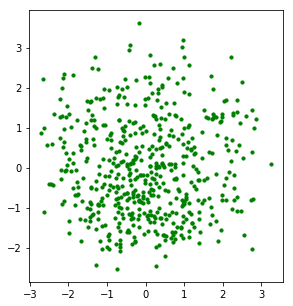

In [9]:
########## PCA of features for Kmeans
from sklearn.decomposition import PCA
pca_model = PCA(n_components = 150)
X_new = pca_model.fit_transform(X)
sumvar = 45.85
print(sum(pca_model.explained_variance_)/sumvar)

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(121)
ax.scatter(X_new[:, 0], X_new[:, 1],c='green', marker='o', s=10)
# ax = fig.add_subplot(122)
# ax.scatter(X_new[:, 0], X_new[:, 1], c=colors[kmean.labels_], marker='*')
X_new = pd.DataFrame(X_new)
X_new.to_csv('drugFeatureReductionBypca.csv',index=False)

In [29]:
# def draw_vector(v0, v1, ax=None):
#     ax = ax or plt.gca()
#     arrowprops=dict(arrowstyle='->',
#                     linewidth=2,
#                     shrinkA=0, shrinkB=0)
#     ax.annotate('', v1, v0, arrowprops=arrowprops)

# # plot data
# plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
# for length, vector in zip(pca.explained_variance_, pca.components_):
#     v = vector * 3 * np.sqrt(length)
#     draw_vector(pca.mean_, pca.mean_ + v)
# plt.axis('equal');

Computing embedding
Done.


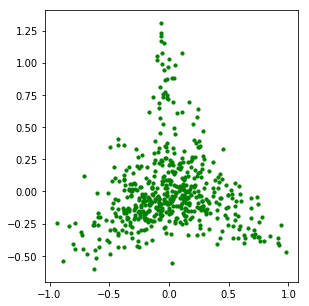

In [10]:
from sklearn import manifold
# 2D embedding of dataset
print("Computing embedding")
X_red = manifold.SpectralEmbedding(n_components=150).fit_transform(X)
print("Done.")
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(121)
ax.scatter(X_red[:, 0], X_red[:, 1],c='green', marker='o', s=10)
X_red = pd.DataFrame(X_red)
X_red.describe()
X_red.to_csv('drugFeatureReductionByManifpold.csv',index=False)

In [31]:
df = pd.read_csv('../saved F.csv')

df.head()


,0,1,2,3,4,5,6,7,8,9,...,594,595,596,597,598,599,600,601,602,603
0,DB00945,DB00526,1,-0.16505,-1.258199,0.597293,-0.156462,0.348621,-0.667007,1.322044,...,0.328441,0.415781,0.319431,-0.042458,0.946831,0.250874,-0.958129,0.424604,-0.033991,-0.403019
1,DB00945,DB00458,1,-0.16505,-1.258199,0.597293,-0.156462,0.348621,-0.667007,1.322044,...,0.328806,0.059391,-0.492187,0.705714,0.649779,-0.364021,-0.892590,0.107132,0.056346,-0.607677
2,DB00945,DB00996,1,-0.16505,-1.258199,0.597293,-0.156462,0.348621,-0.667007,1.322044,...,-0.426081,0.146653,0.175750,0.108967,1.248668,0.102276,0.578735,-0.054706,0.108457,-0.622844
3,DB00945,DB00454,1,-0.16505,-1.258199,0.597293,-0.156462,0.348621,-0.667007,1.322044,...,-0.256004,0.004764,-0.096435,0.277266,1.228620,-0.285609,-0.432828,-0.366853,-0.641682,-0.260116
4,DB00945,DB00952,0,-0.16505,-1.258199,0.597293,-0.156462,0.348621,-0.667007,1.322044,...,0.138760,0.233952,-0.049755,-0.232846,0.358096,-0.026084,-0.792985,0.616666,-0.241326,-0.679142


In [32]:
X=df.values[:,3:]
y=df.values[:,2]
del df


In [33]:
X.shape


(283556, 600)

[0.00157823 0.00181342 0.00124574 0.00149667 0.00169532 0.00155304
 0.00156066 0.00185185 0.00139821 0.00263597 0.00180572 0.0014332
 0.00200127 0.0018612  0.00145212 0.00128438 0.00124107 0.00130919
 0.0015814  0.00138016 0.00149126 0.00214935 0.00249906 0.00141172
 0.00179524 0.00146537 0.00144632 0.00187837 0.003524   0.00216749
 0.00123054 0.0014869  0.00153062 0.00160219 0.00143217 0.00136375
 0.0012467  0.0015164  0.00134581 0.00167367 0.00157152 0.00166441
 0.00160602 0.00183401 0.00128058 0.0015127  0.00128006 0.0016183
 0.00171354 0.0015204  0.00195976 0.0018866  0.00132102 0.0016259
 0.00145423 0.00137832 0.0014393  0.00172226 0.00161789 0.00180188
 0.00150193 0.00152692 0.0014386  0.00141931 0.00133765 0.00172051
 0.00171216 0.00161776 0.00135131 0.00141971 0.00160932 0.00138292
 0.0033448  0.00144968 0.00338331 0.00171166 0.00333011 0.00124155
 0.00151439 0.00158524 0.00150499 0.00131136 0.00142696 0.00149254
 0.00150604 0.00170119 0.00165213 0.00370983 0.00148968 0.0016095

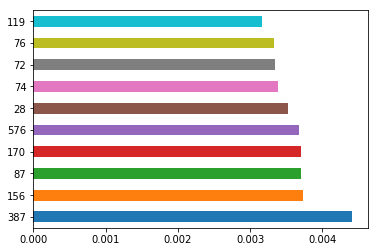

In [23]:
# import pandas as pd
# import numpy as np
# data = pd.read_csv("D://Blogs//train.csv")
# X = data.iloc[:,0:20]  #independent columns
# y = data.iloc[:,-1]    #target column i.e price range1
y = np.array(list(y))
X = pd.DataFrame(X)
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()


In [25]:
# print(scipy.stats.entropy(X['OverlapPROmeanAcuracy']))
# X.columns
# for f in X.columns:
#     print(f, scipy.stats.entropy(X[f]))
    

In [ ]:
from sklearn.linear_model import LassoCV
reg = LassoCV()
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")
coef1 = np.abs(coef)
feat_importances = pd.Series(coef1, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()
coef

In [ ]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (0.0, 20.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

 Removing features with low variance


In [5]:
# from sklearn.feature_selection import VarianceThreshold
# # X = [[0, 0, 1], [0, 1, 0], [1, 0, 0], [0, 1, 1], [0, 1, 0], [0, 1, 1]]
# sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
# z = sel.fit_transform(X)
# z = pd.DataFrame(z)
# z

Univariate feature selection

In [41]:

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

print(X.shape)

X_new = SelectKBest(chi2).fit_transform(X, y)
print(X_new.shape)
pd.DataFrame(X_new)

(85, 61)
(85, 10)


,0,1,2,3,4,5,6,7,8,9
0,535.00,17.86,535.00,535.00,2.02,21.76,160.20,20.36,160.04,7.0
1,0.05,12.90,0.10,0.05,0.00,0.02,153.01,31.67,68.03,4.0
2,388.05,12.90,0.10,0.05,8.70,134.01,160.02,21.67,160.08,6.0
3,0.08,7.69,0.15,0.37,0.00,35.01,160.01,43.33,0.01,4.0
4,0.03,34.29,0.05,0.17,12.50,134.01,160.01,38.26,160.01,4.0
5,0.03,17.14,0.06,0.61,4.17,0.03,0.01,27.50,68.03,2.0
6,424.00,60.76,145.00,135.00,4.17,0.04,158.02,37.50,11.04,4.0
7,669.02,0.00,0.02,0.02,4.17,134.01,158.01,33.33,23.01,6.0
8,570.82,43.08,51070.84,556.25,12.50,0.10,0.04,26.67,34.11,13.0
9,669.71,31.97,669.73,415.14,4.17,135.01,158.01,53.33,160.01,4.0


L1-based feature selection

In [42]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel


X.shape

lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X, y)
model = SelectFromModel(lsvc, prefit=True)
X_new = model.transform(X)
X_new.shape


c:\program files\python36\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


(85, 18)

Tree-based feature selection

In [43]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

print(X.shape)

clf = ExtraTreesClassifier(n_estimators=50)
clf = clf.fit(X, y)
print(clf.feature_importances_)  

model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X)
X_new.shape               


(85, 61)
[0.00372791 0.00660112 0.00826562 0.0258127  0.01165138 0.01155322
 0.00564496 0.01285867 0.04336698 0.00877481 0.01067379 0.00299514
 0.00938555 0.01607615 0.01333738 0.00629597 0.06799911 0.01064559
 0.00657833 0.00862027 0.0087692  0.01825015 0.01791649 0.01244449
 0.01092338 0.04017809 0.03023612 0.00811237 0.00953944 0.0133325
 0.01606191 0.01937595 0.01369381 0.00422647 0.02349942 0.02041791
 0.01815658 0.00618169 0.00024711 0.04133593 0.00488305 0.00486201
 0.00117675 0.08215557 0.04925751 0.02620055 0.0338915  0.03543546
 0.00843501 0.0104865  0.00450162 0.00523331 0.01021683 0.00670223
 0.00357707 0.0061499  0.01132205 0.02189752 0.01176003 0.02026155
 0.01783028]


(85, 20)